In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
pd.options.display.max_rows = 100

In [2]:
#Load dummy tables
df_ingredient=pd.read_csv('ingredient_dummy.csv')
df_keyword=pd.read_csv('keyword_dummy.csv')

#load reduced files
# df_ingredient=pd.read_csv('ingredient_dummy_dropna.csv')
# df_keyword=pd.read_csv('keyword_dummy_dropna.csv.csv')

In [26]:
#Table sizes
print('  ingredient ', '    keyword')
print(df_ingredient.shape, df_keyword.shape)

  ingredient      keyword
(269294, 7327) (269294, 342)


# ML Analysis

## Best Ingredients given input

In [144]:
#USER INPUT
recipe_type=['high fiber']
cook_time=['< 4 Hours']
Region=['indian']
# ingredient_list=['mint leaves','white sugar']

input_selection={
    'Health':list(map(str.lower,recipe_type)),
    'Prep Time':list(map(str.lower,cook_time)),
    'Country':list(map(str.lower,Region))}
    # 'Ingredients':list(map(str.lower,ingredient_list))}

In [145]:
df_combined_keyword=df_keyword.copy()
df_combined_ingredient=df_ingredient.copy()

In [146]:
#Filter based on input_selection
filter = df_combined_keyword[[''.join(input_selection['Health']),''.join(input_selection['Prep Time']), ''.join(input_selection['Country'])]]
df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)

#TEMP alternative input (To be deleted)
# filter = df_combined_keyword[[''.join(input_selection['Country'])]]
# df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)
                                                                                              

In [147]:
df_combined = df_combined_ingredient.loc[df_combined_keyword.index]
drop_cols=df_combined.iloc[:,29:].sum()==0
df_combined = df_combined.drop(columns=drop_cols[drop_cols].index,axis=1)
df_combined.shape

(723, 870)

In [148]:
#training datasets
y=df_combined['AggregatedRating']
# X=df_combined.drop(columns='AggregatedRating')
X = df_combined.drop(columns=df_combined.columns[0:29])

In [149]:
X

,% low-fat milk,chinese five spice powder,cotija cheese,dijon mustard,hellmann's mayonnaise,hungarian paprika,italian tomatoes,madras curry powder,minute rice,red delicious apple,...,rose essence,kasuri methi,jeera seeds,mace blades,tandoori color powder,dry methi leaves,black ground cumin,fragrant basmati rice with apple juice and ginger,\n),", \n"
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

model = LinearRegression()
model.fit(X, y)
print(f"Model's slope: {model.coef_}")
print(f"Model's y-intercept: {model.intercept_}")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [ 1.84074562e+01  3.80826517e+01 -6.33633573e+10  1.39327083e+00
  1.12137409e+11  1.08591532e+02 -1.57951156e+01  8.37704636e+01
 -7.39099708e+00  2.45871779e+10 -3.05364835e+10  3.26143456e+00
 -2.35070228e+09 -6.53149899e-01 -3.05364837e+10 -9.01326450e-02
 -3.51699634e+00 -2.26353430e+10  4.62219552e+10  1.71300693e+01
 -5.18443623e-01 -3.66395139e+10 -8.55187025e-01 -4.42813156e+10
 -9.28526898e+10  6.52250888e+00 -4.94261563e+00  3.58963820e+00
 -4.95958755e-01 -2.82914776e+00  2.27831217e+00 -1.38726102e+11
  1.67899758e+00 -1.41291618e+00  4.32247000e+10 -3.81451035e+00
 -9.02221653e+09  8.49512953e+00 -6.26144409e-02  5.37156963e+00
 -2.00409300e+09  2.42121947e+09 -1.78092263e+10  3.35435463e+09
  2.72807100e+10 -6.39562607e-01  5.67279196e+00  8.39229107e-01
  4.18008447e+00 -9.46446962e+09  1.01829713e+02  3.69792784e+01
 -1.89811954e+01 -9.48634195e+00  3.32472801e-01  1.21951208e+02
 -2.31638980e+01 -1.79033762e+09 -3.47448862e+09  1.43358090e+01
  2.623691

In [151]:
# Make predictions using the X set
predicted_y_values = pd.DataFrame(model.predict(X), columns=['predicted values'])
# Create a copy of the original data
df_ingredients_predicted = pd.concat([df_combined['AggregatedRating'].reset_index(),predicted_y_values],axis=1)

# Display sample data
df_ingredients_predicted.head()

,index,AggregatedRating,predicted values
0,112,5.0,4.999893
1,263,4.0,3.999232
2,491,4.0,3.999683
3,1638,4.5,4.500297
4,1648,4.0,3.997502


In [152]:
#boxplot x-axis
df_ingredients_predicted['AggregatedRating'].value_counts().index.sort_values()

Index([1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64', name='AggregatedRating')

In [153]:
#Prepping data for boxplot below
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
boxes=[]
labels=[]
for rating in df_ingredients_predicted['AggregatedRating'].value_counts().index.sort_values():
    boxes.append(df_ingredients_predicted[df_ingredients_predicted['AggregatedRating']==rating]['predicted values'])
    labels.append(rating)

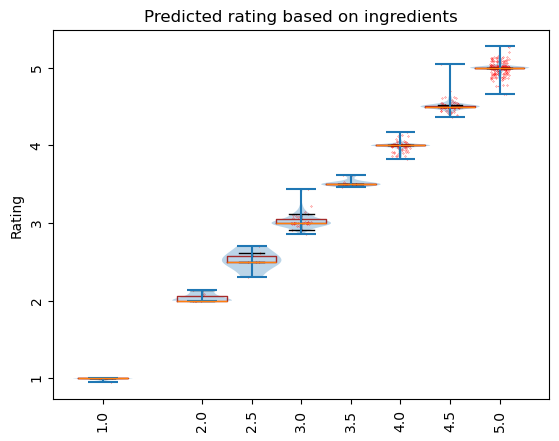

In [154]:
#Plot of predicted Rating based on website input
# plt.figure(figsize=(14,3))
plt.boxplot(boxes,labels=labels, showbox=True, boxprops={'linestyle':'-', 'linewidth':1, 'color':'brown'}, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} , positions=labels)
plt.violinplot(boxes, widths=.6, positions=labels)
plt.scatter(df_ingredients_predicted['AggregatedRating']+0.2*random.rand(len(df_ingredients_predicted['AggregatedRating']),1).ravel()-.1,
            df_ingredients_predicted['predicted values'],marker='o',s=.05,c='r')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Rating')
plt.title('Predicted rating based on ingredients')
# plt.ylim(3,5)
plt.show()

In [155]:
X.sum()

% low-fat milk                                       1
chinese five spice powder                            1
cotija cheese                                        1
dijon mustard                                        4
hellmann's mayonnaise                                1
                                                    ..
dry methi leaves                                     1
black ground cumin                                   1
fragrant basmati rice with apple juice and ginger    1
\n)                                                  1
, \n                                                 1
Length: 841, dtype: int64

In [158]:
#Best ingredients you can use given the website input
best_ingredients = pd.DataFrame({'ingredient': X.columns, 'impact':model.coef_, 'frequency':X.sum()})
# best_ingredients = best_ingredients.drop(index=best_ingredients[(best_ingredients['impact']>1e3)|(best_ingredients['impact']<-1e3)].index).sort_values(by='impact', ascending=False)
best_ingredients = best_ingredients.sort_values(by='impact', ascending=False)
best_ingredients[best_ingredients['frequency']>50].head(10)


,ingredient,impact,frequency
cinnamon,cinnamon,3.524918,54
curry powder,curry powder,3.169155,106
cinnamon stick,cinnamon stick,3.062273,63
cumin,cumin,2.374079,54
coconut milk,coconut milk,2.186792,59
garam masala,garam masala,2.112305,175
cayenne pepper,cayenne pepper,1.485489,79
mustard seeds,mustard seeds,1.225772,51
green chilies,green chilies,1.074375,84
chili powder,chili powder,1.033855,113


In [159]:
#Worst ingredients you can use given the website input
best_ingredients[best_ingredients['frequency']>50].tail(10)

,ingredient,impact,frequency
salt,salt,-0.386494,538
coriander powder,coriander powder,-0.402081,63
fresh ginger,fresh ginger,-0.548920,172
ground turmeric,ground turmeric,-1.067661,73
turmeric,turmeric,-1.182472,168
turmeric powder,turmeric powder,-1.307625,84
onion,onion,-1.432686,236
cumin powder,cumin powder,-2.056997,52
paprika,paprika,-2.188820,57
fresh cilantro,fresh cilantro,-5.265459,55


## Dimensionality reduction